In [1]:
from classes import *

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features']
                 for i in range(0, p_sim['n_features'])]
p_sim['alpha'] = 3
p_sim['lamb'] = 1
p_sim['coef_tt'] = 1.8
p_sim['rho'] = 0.0
p_sim['kappa'] = 3.
p_sim['wd_param'] = 3. #4.
p_sim['scheme'] = 'linear'#'linear'
p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10


In [3]:
p_survcaus

{'num_durations': 25,
 'encoded_features': 20,
 'alpha_wass': 1,
 'batch_size': 256,
 'epochs': 100,
 'lr': 0.01,
 'patience': 10}

In [4]:
# Simulation of data
simu = Simulation(p_sim)
data = simu.simulation_surv()
data


WD =  184.78453063964844
tt = 1 : 49 % 
event = 1 : 71 %


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,2.862422,2.634108,3.863074,1.240433,0.330444,3.184685,1.776290,2.454539,1.209236,1.034547,...,1.150321,0.359813,0,0.592752,1,0.498421,0.592752,0.592752,0.498421,0.038725
1,1.338426,1.853242,1.769720,1.422715,0.873620,1.242914,2.256098,1.789178,1.421042,1.139811,...,1.104486,1.851919,0,0.580502,0,0.447715,1.048684,1.048684,0.447715,0.008490
2,-0.998067,-2.390235,-0.780134,-3.952710,-0.747839,-3.017200,-3.123956,-1.981341,-0.377790,-2.050453,...,-1.540195,0.207234,1,0.432203,1,0.432203,1.085395,0.432203,1.085395,-0.011113
3,1.233086,0.426054,1.845270,2.706191,2.200719,3.071582,1.781880,1.973080,2.006795,0.917547,...,2.423817,0.666225,0,0.938989,1,0.614252,0.938989,0.938989,0.614252,0.017894
4,1.311820,0.081303,0.756990,1.005509,2.474799,2.489643,1.647186,2.536353,0.885649,2.754861,...,0.945134,3.342995,0,1.690807,1,0.632597,1.690807,1.690807,0.632597,-0.000720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.433640,-2.440882,-1.606711,-0.627143,-1.265945,-0.745523,-0.477224,-1.840586,-0.721641,-2.465648,...,-1.436994,-1.025231,1,0.429192,1,0.429192,1.047184,0.429192,1.047184,0.001497
996,-1.763024,-2.278808,-1.582131,-3.922334,-0.764467,-0.706185,-0.298487,-1.776059,-2.135421,-1.294622,...,-2.241553,-0.587066,1,0.205812,1,0.205812,0.731795,0.205812,0.731795,-0.022797
997,-0.692520,-1.188117,-0.606305,-2.237957,-2.573430,-4.507270,-2.353158,-0.554808,-2.774696,-0.967761,...,-0.542698,-1.499746,1,0.205111,0,0.399215,0.683017,0.399215,0.683017,-0.014985
998,-0.632013,1.498301,0.132578,2.160112,0.786872,2.731923,1.665134,2.117160,3.341697,1.089223,...,1.521431,2.296632,0,0.171743,0,0.672196,1.290124,1.290124,0.672196,-0.017968


In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.020776,0.053733,0.008052,0.016670,0.002343,0.052932,0.057297,0.077445,-0.010809,0.019255,...,0.045258,0.038624,0.495000,0.561370,0.713000,0.489022,0.875520,0.683546,0.680997,0.001142
std,1.561759,1.972627,1.602860,1.996913,1.609891,1.981381,1.607236,1.882773,1.708061,1.877974,...,1.794523,1.757368,0.500225,0.315552,0.452588,0.176196,0.318520,0.322818,0.321015,0.029374
min,-4.281282,-4.414670,-4.337535,-4.859459,-4.282514,-4.528591,-4.626113,-4.827822,-4.047842,-4.668301,...,-4.822405,-4.028148,0.000000,0.002323,0.000000,0.048434,0.141813,0.048434,0.091560,-0.093520
25%,-1.139152,-1.676018,-1.292370,-1.639353,-1.248987,-1.662354,-1.213143,-1.521731,-1.448662,-1.573801,...,-1.442245,-1.443683,0.000000,0.330158,0.000000,0.357981,0.634596,0.442604,0.451046,-0.017634
50%,0.015614,0.116048,0.087229,-0.041673,-0.000406,0.057176,0.061321,0.122079,-0.011470,0.030069,...,-0.033591,0.113810,0.000000,0.531806,1.000000,0.484608,0.864513,0.624498,0.609555,0.001675
75%,1.198924,1.759986,1.303320,1.727022,1.251034,1.791956,1.325170,1.687550,1.360606,1.610250,...,1.591450,1.476059,1.000000,0.739741,1.000000,0.608272,1.109539,0.879869,0.869444,0.021061
max,4.130375,4.619162,4.130963,4.532990,3.988755,4.688339,4.753525,4.367673,3.883519,4.641300,...,4.763212,5.303667,1.000000,1.836921,1.000000,1.015473,1.894548,1.894548,1.709545,0.099270


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.805192
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.644615
[t-SNE] KL divergence after 1000 iterations: 1.968140


<ipython-input-6-1ba9db191df6>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


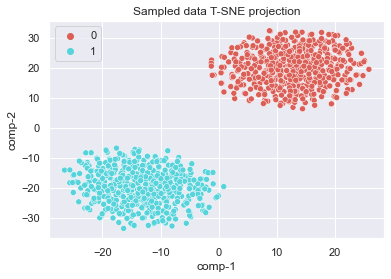

In [6]:
# TSNE
from sklearn.manifold import TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()


In [7]:
# Tunning og hyperparameters

tunning = Tunning(p_sim)
p_survcaus_best = tunning.get_best_hyperparameter(n_trials=1)  #1000
p_survcaus_best

[I 2021-11-02 17:54:50,297] A new study created in memory with name: no-name-8aeed2d1-ad6c-4ae0-8601-477bd22c0474


0:	[0s / 0s],		train_loss: 2.3856,	train_loss_surv: 2.3804,	train_loss_wass: 0.0015,	val_loss: 2.4848,	val_loss_surv: 2.4810,	val_loss_wass: 0.0011
1:	[0s / 0s],		train_loss: 2.2652,	train_loss_surv: 2.2608,	train_loss_wass: 0.0013,	val_loss: 2.4825,	val_loss_surv: 2.4786,	val_loss_wass: 0.0011
2:	[0s / 0s],		train_loss: 2.2381,	train_loss_surv: 2.2336,	train_loss_wass: 0.0013,	val_loss: 2.4802,	val_loss_surv: 2.4762,	val_loss_wass: 0.0012
3:	[0s / 0s],		train_loss: 2.2588,	train_loss_surv: 2.2535,	train_loss_wass: 0.0015,	val_loss: 2.4768,	val_loss_surv: 2.4730,	val_loss_wass: 0.0011
4:	[0s / 0s],		train_loss: 2.2152,	train_loss_surv: 2.2103,	train_loss_wass: 0.0014,	val_loss: 2.4722,	val_loss_surv: 2.4686,	val_loss_wass: 0.0011
5:	[0s / 1s],		train_loss: 2.1850,	train_loss_surv: 2.1800,	train_loss_wass: 0.0015,	val_loss: 2.4667,	val_loss_surv: 2.4634,	val_loss_wass: 0.0010
6:	[0s / 1s],		train_loss: 2.1144,	train_loss_surv: 2.1103,	train_loss_wass: 0.0012,	val_loss: 2.4610,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

18:	[0s / 3s],		train_loss: 1.8378,	train_loss_surv: 1.8351,	train_loss_wass: 0.0008,	val_loss: 2.3559,	val_loss_surv: 2.3537,	val_loss_wass: 0.0006
19:	[0s / 3s],		train_loss: 1.8568,	train_loss_surv: 1.8541,	train_loss_wass: 0.0008,	val_loss: 2.3446,	val_loss_surv: 2.3424,	val_loss_wass: 0.0006


100%|██████████| 200/200 [00:00<00:00, 402.53it/s]
[I 2021-11-02 17:54:55,039] Trial 0 finished with value: 0.06773516089555653 and parameters: {'num_durations': 23, 'encoded_features': 27, 'alpha_wass': 3.439674602984174, 'lr': 0.0009171704871543069}. Best is trial 0 with value: 0.06773516089555653.


{'num_durations': 23,
 'encoded_features': 27,
 'alpha_wass': 3.439674602984174,
 'lr': 0.0009171704871543069}

SurvCaus
{'num_durations': 23, 'encoded_features': 27, 'alpha_wass': 3.439674602984174, 'lr': 0.0009171704871543069, 'patience': 4, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.2572,	train_loss_surv: 2.2559,	train_loss_wass: 0.0004,	val_loss: 2.4199,	val_loss_surv: 2.4189,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.2397,	train_loss_surv: 2.2382,	train_loss_wass: 0.0004,	val_loss: 2.4168,	val_loss_surv: 2.4156,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.2261,	train_loss_surv: 2.2247,	train_loss_wass: 0.0004,	val_loss: 2.4116,	val_loss_surv: 2.4103,	val_loss_wass: 0.0004
3:	[0s / 0s],		train_loss: 2.1740,	train_loss_surv: 2.1720,	train_loss_wass: 0.0006,	val_loss: 2.4046,	val_loss_surv: 2.4033,	val_loss_wass: 0.0004
4:	[0s / 0s],		train_loss: 2.1391,	train_loss_surv: 2.1367,	train_loss_wass: 0.0007,	val_loss: 2.3971,	val_loss_surv: 2.3958,	val_loss_wass: 0.0004
5:	[0s / 0s],		train_loss: 2.1119,	train_loss_surv: 2.1103,	train_loss_wass: 0.0005,	val_loss: 

 13%|█▎        | 26/200 [00:00<00:00, 259.42it/s]

19:	[0s / 3s],		train_loss: 1.7652,	train_loss_surv: 1.7636,	train_loss_wass: 0.0005,	val_loss: 2.2807,	val_loss_surv: 2.2796,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 374.27it/s]


SurvCaus_0
{'num_durations': 23, 'encoded_features': 27, 'alpha_wass': 0.0, 'lr': 0.0009171704871543069, 'patience': 4, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.3503,	train_loss_surv: 2.3503,	train_loss_wass: 0.0015,	val_loss: 2.4669,	val_loss_surv: 2.4669,	val_loss_wass: 0.0011
1:	[0s / 0s],		train_loss: 2.2435,	train_loss_surv: 2.2435,	train_loss_wass: 0.0017,	val_loss: 2.4678,	val_loss_surv: 2.4678,	val_loss_wass: 0.0012
2:	[0s / 1s],		train_loss: 2.2838,	train_loss_surv: 2.2838,	train_loss_wass: 0.0014,	val_loss: 2.4695,	val_loss_surv: 2.4695,	val_loss_wass: 0.0011
3:	[0s / 1s],		train_loss: 2.2197,	train_loss_surv: 2.2197,	train_loss_wass: 0.0019,	val_loss: 2.4705,	val_loss_surv: 2.4705,	val_loss_wass: 0.0011


 22%|██▏       | 44/200 [00:00<00:00, 427.81it/s]

4:	[0s / 1s],		train_loss: 2.1543,	train_loss_surv: 2.1543,	train_loss_wass: 0.0019,	val_loss: 2.4700,	val_loss_surv: 2.4700,	val_loss_wass: 0.0011


100%|██████████| 200/200 [00:00<00:00, 341.79it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1080.276 - ||grad||^2 = 261.90249
 * Iteration #2 - Loss = 1012.446 - ||grad||^2 = 231.81786
 * Iteration #3 - Loss = 973.835 - ||grad||^2 = 206.79948
 * Iteration #4 - Loss = 948.142 - ||grad||^2 = 185.10545
 * Iteration #5 - Loss = 929.774 - ||grad||^2 = 165.99565
 * Iteration #6 - Loss = 916.097 - ||grad||^2 = 149.02990
 * Iteration #7 - Loss = 905.649 - ||grad||^2 = 133.89987
 * Iteration #8 - Loss = 897.530 - ||grad||^2 = 120.36902
 * Iteration #9 - Loss = 891.144 - ||grad||^2 = 108.24576
 * Iteration #10 - Loss = 886.077 - ||grad||^2 = 97.36972
 * Iteration #11 - Loss = 882.032 - ||grad||^2 = 87.60367
 * Iteration #12 - Loss = 878.788 - ||grad||^2 = 78.82850
 * Iteration #13 - Loss = 876.177 - ||grad||^2 = 70.93982
 * Iteration #14 - Loss = 874.070 - ||grad||^2 = 63.84551
 * Iteration #15 - Loss = 872.367 - ||grad||^2 = 57.46385
 * Iteration #16 - Loss = 870.988 - ||grad||^2 = 51.72208
 * Iteration #17 - Loss =

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #103 - Loss = 999.414 - ||grad||^2 = 0.01252
 * Iteration #104 - Loss = 999.414 - ||grad||^2 = 0.01126
 * Iteration #105 - Loss = 999.414 - ||grad||^2 = 0.01014
 * Iteration #106 - Loss = 999.414 - ||grad||^2 = 0.00912
Converged after 106 iterations.


100%|██████████| 200/200 [00:02<00:00, 80.03it/s] 


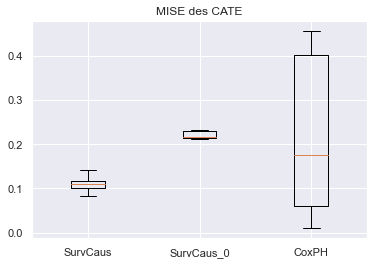

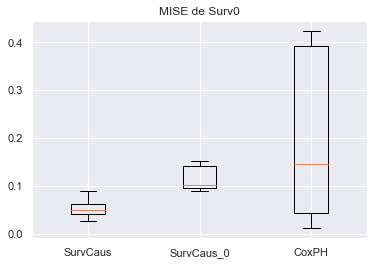

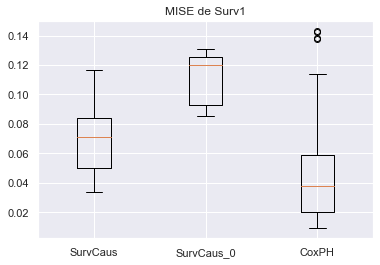

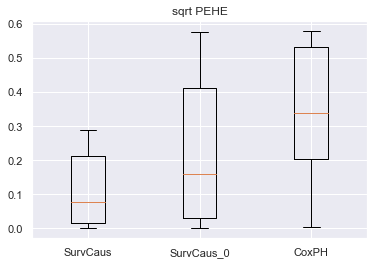

In [8]:
# Evaluation - benchmark

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 4
p_survcaus['epochs']=20
p_survcaus['batch_size']=256


Ev = Evaluation(p_sim, p_survcaus)
Ev.All_Results(list_models=["SurvCaus", "SurvCaus_0",'CoxPH'],
               is_train=False)      # , 'CoxPH', 'BART'

In [9]:

# Bilan of benchmark
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE
0,SurvCaus,"(0.052, 0.014)","(0.068, 0.018)","(0.11, 0.012)","(0.111, 0.101)"
1,SurvCaus_0,"(0.118, 0.023)","(0.11, 0.016)","(0.222, 0.007)","(0.223, 0.202)"
2,CoxPH,"(0.216, 0.17)","(0.044, 0.029)","(0.229, 0.166)","(0.333, 0.191)"


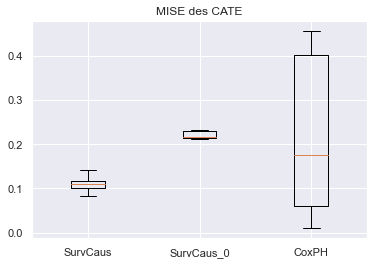

In [10]:
Ev.box_plot_cate

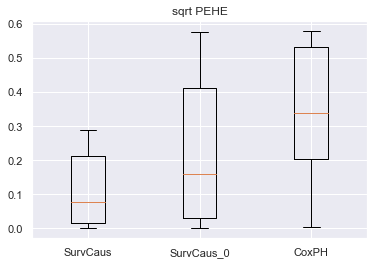

In [11]:
Ev.box_plot_pehe

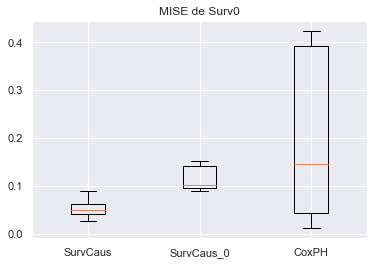

In [12]:
Ev.box_plot_surv0

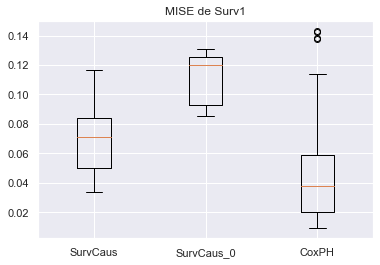

In [13]:
Ev.box_plot_surv1

(p_ours,p_bench) = (182, 73)
(p_ours,p_bench) = (182, 197)


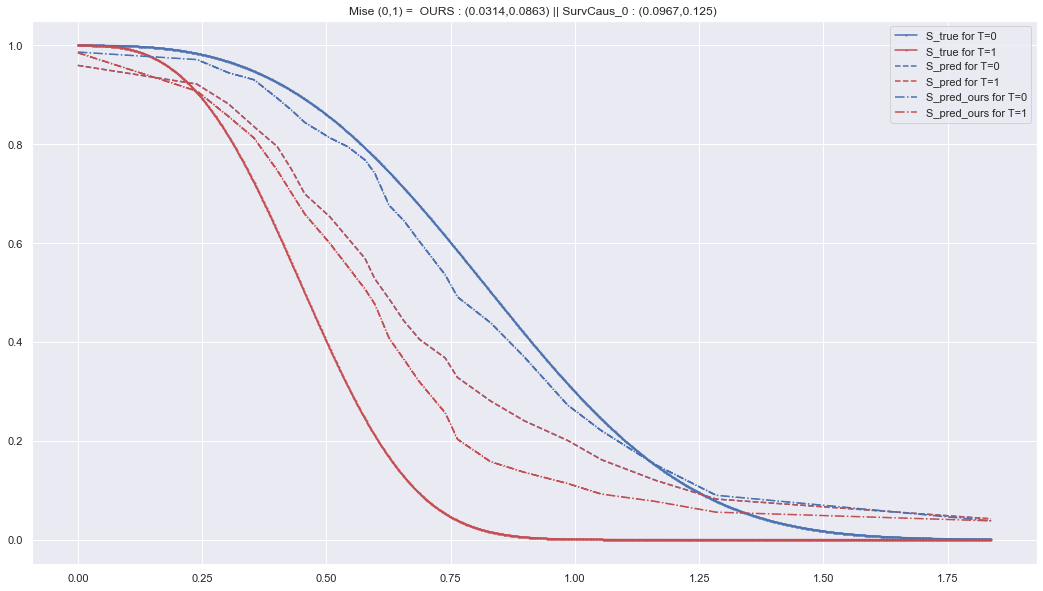

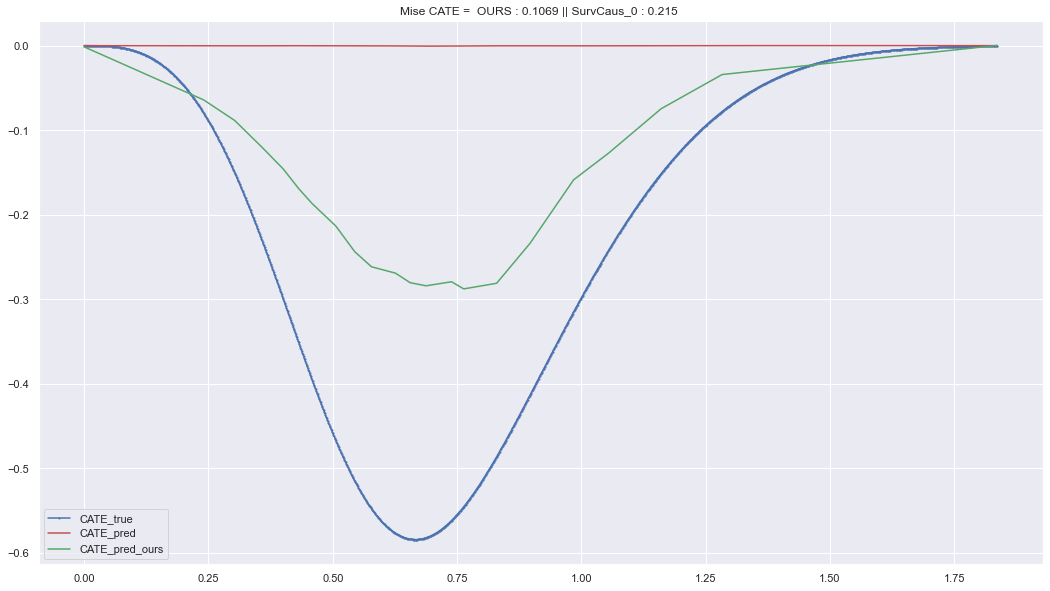

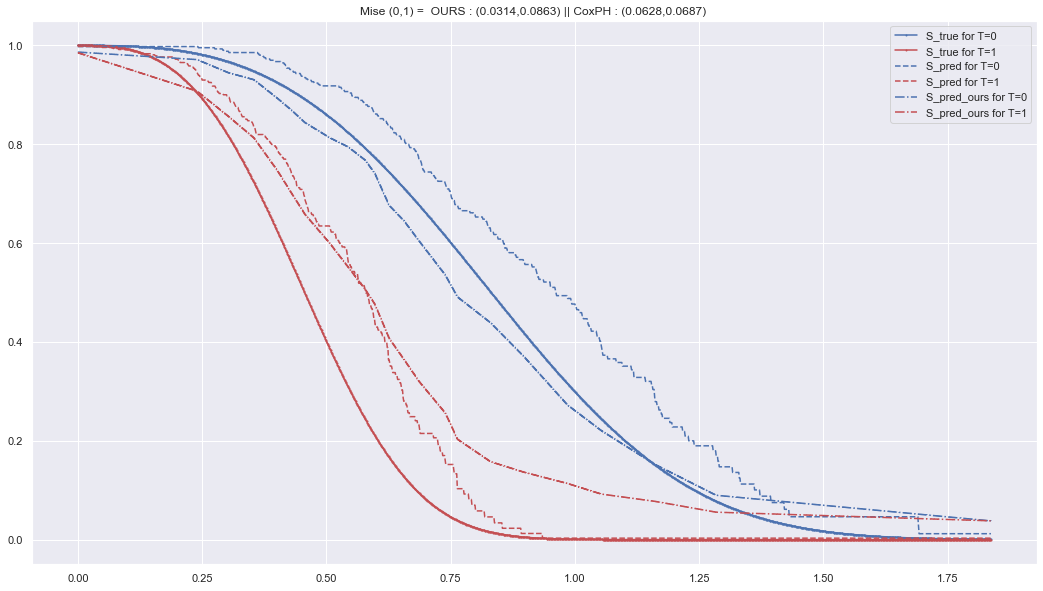

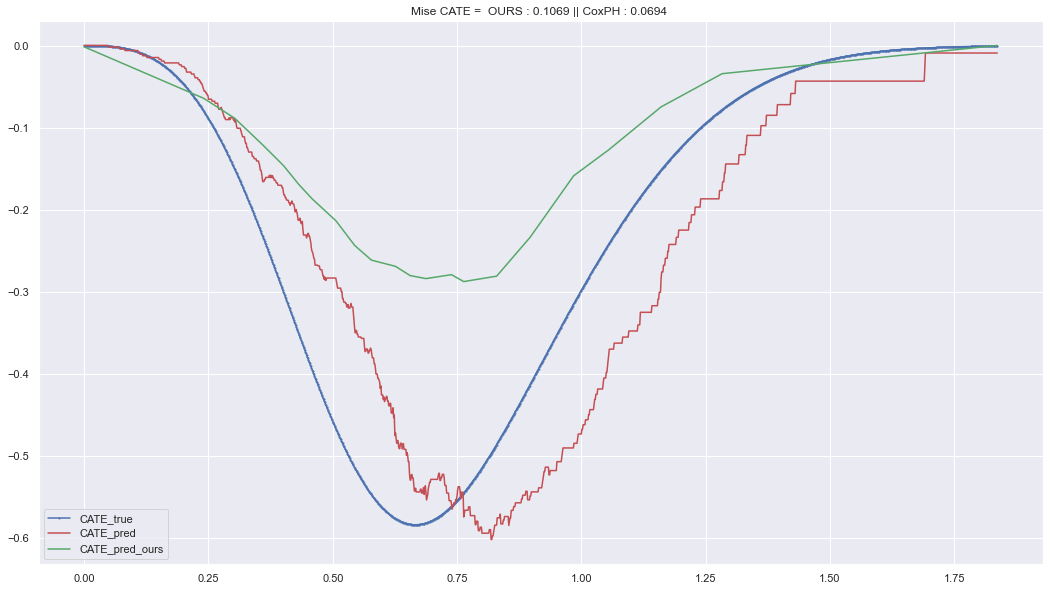

In [14]:

patient = 67
%matplotlib inline

for model_name in Ev.list_models[1:] :
    fig_surv,fig_cate = plots(patient, Ev.d_list_models, model_name)

